# Theta selection #
In the previous notebook we set the parameter $\theta$=2 without justification. In order to optimally choose $\theta$, it is useful to scan different values of this parameter, and plot $\chi^2$ vs $n_{eff}$. This can be easily done using the BME script, as we show below. 


In [10]:
# import modules
import sys
import os
cwd = os.getcwd()[:-8]
sys.path.append(cwd)
import bme_reweight as bme
import numpy as np

exp_couplings = '../data/couplings_exp.dat'
calc_couplings = '../data/couplings_calc.dat'
exp_noe = '../data/noe_exp.dat'
calc_noe = '../data/noe_calc.dat'

# initialize reweighting class                                                                                                                                
rew = bme.Reweight(verbose=False)
# load data                                                                                      
rew.load(exp_couplings,calc_couplings)

# loop over thetas and append results to list
thetas = [0.1,0.5,1,2,3,5,10,15,20,50,100,200,500,1000,50000]
results = []
for t in thetas:
    # optimize. return chi2 for j couplings
    chi2_before,chi2_after, srel = rew.optimize(theta=t)
    neff = np.exp(-srel)
    # calculate chi2 relative to NOE
    chi2_noe_before, chi2_noe_after = rew.weight_exp(exp_noe,calc_noe,"theta_scan_%.1f" % t)
    # append to list
    results.append([neff,chi2_before,chi2_after,chi2_noe_before, chi2_noe_after])
    

# Warning: expt average 2-2H5P=0.5000     is smaller than minimum value in simulation 0.9920    
# exp data: (26, 2)
# calc data: (20000, 26)
# exp data: (26, 2)
# calc data: (20000, 26)
# exp data: (26, 2)
# calc data: (20000, 26)
# exp data: (26, 2)
# calc data: (20000, 26)
# exp data: (26, 2)
# calc data: (20000, 26)
# exp data: (26, 2)
# calc data: (20000, 26)
# exp data: (26, 2)
# calc data: (20000, 26)
# exp data: (26, 2)
# calc data: (20000, 26)
# exp data: (26, 2)
# calc data: (20000, 26)
# exp data: (26, 2)
# calc data: (20000, 26)
# exp data: (26, 2)
# calc data: (20000, 26)
# exp data: (26, 2)
# calc data: (20000, 26)
# exp data: (26, 2)
# calc data: (20000, 26)
# exp data: (26, 2)
# calc data: (20000, 26)
# exp data: (26, 2)
# calc data: (20000, 26)


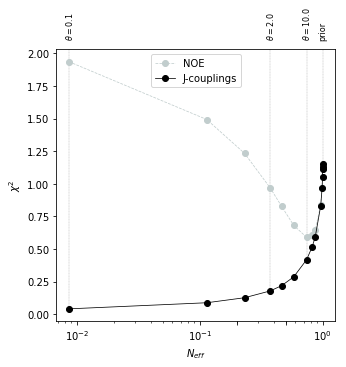

In [22]:
import matplotlib.pyplot as plt
results = np.array(results)
fig, ax1 = plt.subplots(figsize=(5, 5))
ax1.plot(results[:,0],results[:,4],label="NOE",c='#C1CDCD',ls="--",lw=0.75,marker="o")
ax1.plot(results[:,0],results[:,2],label="J-couplings",c='k',lw=0.75,ls="-",marker='o')

idxs1 = [0,3,6,len(thetas)-1]
xmi,xma= ax1.get_ylim()
for i in idxs1:
    xx= (-xmi + results[i,2])/(xma-xmi)
    ax1.axvline(results[i,0],ymin=xx,ls='--',c='gray',lw=0.3,zorder=0)
    if(results[i,0]>0.99):
        if(i==len(thetas)-1):
            ax1.text(results[i,0],2.1,"prior",va='bottom',fontsize=8,ha='center',rotation=90)
        else:
            ax1.text(results[i,0],2.1,r"$\theta=%.0f$" % thetas[i],va='bottom',fontsize=8,ha='center',rotation=90)
    else:
        ax1.text(results[i,0],2.1,r"$\theta=%.1f$" % thetas[i],va='bottom',fontsize=8,ha='center',rotation=90)

ax1.legend()
ax1.set_ylabel(r'$\chi^2$')
ax1.set_xlabel(r'$N_{eff}$')
ax1.set_xscale('log')
ax1.set_xticks([0.01,0.1,0.2,0.5,1.0])
